# 04. PyTorch Custom Datasets Video Notebook

We've used some datasets with Pytorch before.

But how do you get your own data into PyTorch ?

One of the ways to do so is via: Custom datasets.

## Domain libraries

Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable daa loading functions.

**Resources**
- Book version of the course material for 04: https://www.learnpytorch.io/04_pytorch_custom_datasets/
- Ground truth version of notebook 04: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb

##  0. Importing PyTorch and setting up device agnostic code.

In [2]:
import torch
import torch.nn as nn

# Note: PyTorch 1.10.0 + is required for this course.
torch.__version__

'2.5.1+cu121'

In [3]:
# setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
!nvidia-smi

Sun Jun 15 08:06:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P5              5W /   35W |     205MiB /   4096MiB |     32%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

 ## 1. Get data

 Our dataset is a subset of the Food101 dataset.

 Food 101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

 our dataset starts with 3 classes of food and only 10% of the images (~ 75 training, 25 testing)

 why do this ?

 When starting out ML projects, its important to try things on a small scale and then increase the scale when necessary. 
 
 The whole point is to speed up how fast you can experiment.

In [ ]:
import requests

import zipfile
from pathlib import Path

# setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_streak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists..skipping download")
else:
    print(f"{image_path} doesn't exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
# with open(data_path / "pizza_steak_sushi.zip","wb") as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
#     print(f"Downloading pizza, steak, sushi data....")
#     f.write(request.content)

#     # Unzip pizza, steak, sushi data
#     with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip","r") as zip_ref:
#         print("Unzipping pizza, steak and sushi data...")
#         zip_ref.extractall(image_path)

data\pizza_streak_sushi directory already exists..skipping download


KeyboardInterrupt: 

## 2. Becoming one with the data (data preparation and data exploration)

In [6]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents..."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_streak_sushi'. 
There are 3 directories and 0 images in 'data\pizza_streak_sushi\test'. 
There are 0 directories and 25 images in 'data\pizza_streak_sushi\test\pizza'. 
There are 0 directories and 19 images in 'data\pizza_streak_sushi\test\steak'. 
There are 0 directories and 31 images in 'data\pizza_streak_sushi\test\sushi'. 
There are 3 directories and 0 images in 'data\pizza_streak_sushi\train'. 
There are 0 directories and 78 images in 'data\pizza_streak_sushi\train\pizza'. 
There are 0 directories and 75 images in 'data\pizza_streak_sushi\train\steak'. 
There are 0 directories and 72 images in 'data\pizza_streak_sushi\train\sushi'. 


### 2.1 Visualizing and image

Let's write some code to:
1. Get all of the paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the imagewith Python's PIL
5. We'll then show the image and print metadata

data\pizza_streak_sushi\train\sushi\121940.jpg
sushi
Random image path: data\pizza_streak_sushi\train\sushi\121940.jpg
Image Class: sushi
Image Height: 382
Image width: 512


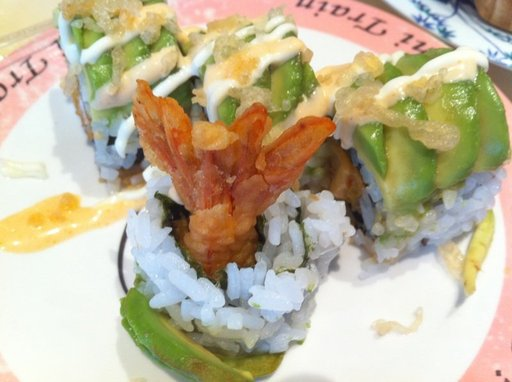

In [11]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory)
image_class = random_image_path.parent.stem

print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image width: {img.width}")
img